In [1]:
# %matplotlib ipympl

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image


In [2]:
# open picture, convert to greyscale
X = Image.open('./Data/bird.jpg').convert('L')
X = np.array(X)

In [18]:
U,S,V = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)
print(U.shape, S.shape, V.shape)

(1280, 1280) (1280, 1280) (1280, 1920)


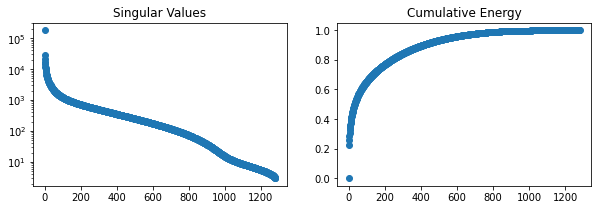

In [119]:
fig,axs = plt.subplots(1,2, figsize=(10,3))

k = np.arange(0,1280)
norm_one_full = np.sum(np.diag(S))
norm_one = lambda x: np.sum(np.diag(S[:x,:x])) / norm_one_full

axs[0].scatter(k,S[k,k])
axs[0].set_yscale('log')
axs[0].set_title('Singular Values')
    
axs[1].scatter(k,[norm_one(i) for i in k])
axs[1].set_title('Cumulative Energy')


plt.show()

Text(0.5, 0.98, 'Comparison original and SVD compressed')

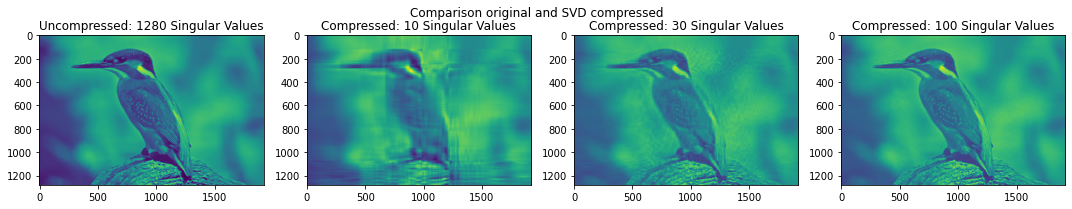

In [44]:

X_compressed = []
for r in [10,30,100]:
    X_compressed.append(np.matmul( U[:,:r], np.matmul(S[:r,:r], V[:r,:])))

fig, axs = plt.subplots(1, 4, figsize=(15,3))

axs[0].imshow(X)
axs[0].set_title('Uncompressed: 1280 Singular Values')
axs[1].imshow(X_compressed[0])
axs[1].set_title('Compressed: 10 Singular Values')
axs[2].imshow(X_compressed[1])
axs[2].set_title('Compressed: 30 Singular Values')
axs[3].imshow(X_compressed[2])
axs[3].set_title('Compressed: 100 Singular Values')


plt.tight_layout()
plt.suptitle('Comparison original and SVD compressed')